In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import collections

%matplotlib inline

In [2]:
ws = pd.read_csv('../data/rare_species_by_watershed.csv')
ws.head(3)

,Huc 8,Huc 8 Name,Huc 12,Huc 12 Name,Type,Category,Scientific Name,Common Name,Global Rank,State Rank,Fed Status,State Status,Habitat Description,Wet Habitat Flag
0,3150101,Conasauga River,31501010101,Headwaters Conasuaga River,Vertebrate Animal,Fish,Notropis asperifrons,Burrhead Shiner,G4,S2,--,"Rare, Not State Listed",Rocky and sandy pools and runs of clear creeks...,Aquatic
1,3150101,Conasauga River,31501010101,Headwaters Conasuaga River,Vertebrate Animal,Fish,Notropis stilbius,Silverstripe Shiner,G4,S3,--,"Rare, Not State Listed",Still or gently flowing pool areas in the Cona...,Aquatic
2,3150101,Conasauga River,31501010101,Headwaters Conasuaga River,Invertebrate Animal,Mollusc,Elliptio arctata,Delicate Spike,G2G3Q,S2,--,"Rare, Not State Listed","In substrates of coarse sand, gravel, and cobb...",Aquatic


In [3]:
ws.columns = ['Huc_8', 'Watershed', 'Huc_12', 'Huc_12Name', 'Type', 'Category', 'Scientific_Name', 'Common_Name', 
               'Global_Rank', 'State_Rank', 'Fed_Status', 'State_Status', 'Habitat', 'Wet_Habitat_Flag']

In [4]:
ws.size

115612

In [5]:
ws['Common_Name'].nunique()

928

In [6]:
caney = ws.loc[(ws.Watershed == 'Caney Fork River')]

In [7]:
caney.shape

(466, 14)

In [8]:
caney.head()

,Huc_8,Watershed,Huc_12,Huc_12Name,Type,Category,Scientific_Name,Common_Name,Global_Rank,State_Rank,Fed_Status,State_Status,Habitat,Wet_Habitat_Flag
1032,5130108,Caney Fork River,51301080101,Glade Creek,Vascular Plant,Flowering Plant,Epilobium ciliatum,Hairy Willow-herb,G5,S1,--,T,Mountain Balds,Possible
1033,5130108,Caney Fork River,51301080101,Glade Creek,Vascular Plant,Flowering Plant,Scleria muehlenbergii,Muhlenberg's Nutrush,G5,S2,--,T,Wet Meadows,Possible
1034,5130108,Caney Fork River,51301080101,Glade Creek,Vascular Plant,Flowering Plant,Platanthera integrilabia,White Fringeless Orchid,G2G3,S2S3,LT,E,Acidic Seeps And Stream Heads,Possible
1035,5130108,Caney Fork River,51301080101,Glade Creek,Vascular Plant,Flowering Plant,Helianthus occidentalis,Naked-stem Sunflower,G5,S2,--,S,Limestone Glades And Barrens,Upland
1036,5130108,Caney Fork River,51301080101,Glade Creek,Vascular Plant,Flowering Plant,Fimbristylis puberula,Hairy Fimbristylis,G5,S1S2,--,T,Wet Prairies And Woods,Possible


In [9]:
caney.to_csv('../data/caney.csv')

In [10]:
caney['Common_Name'].nunique()

185

Global Rank:

In [11]:
gtype_list = caney.Global_Rank.tolist()

In [12]:
gtype_dict = collections.Counter(gtype_list)

In [13]:
gtype_df = pd.DataFrame.from_dict(gtype_dict, orient = 'index', columns = ['count'])

In [14]:
gtype_df = gtype_df.sort_values(['count'], ascending = False).reset_index()

In [15]:
gtype_df = gtype_df.head(8)

In [16]:
gtype_df = gtype_df.sort_values(['count'])

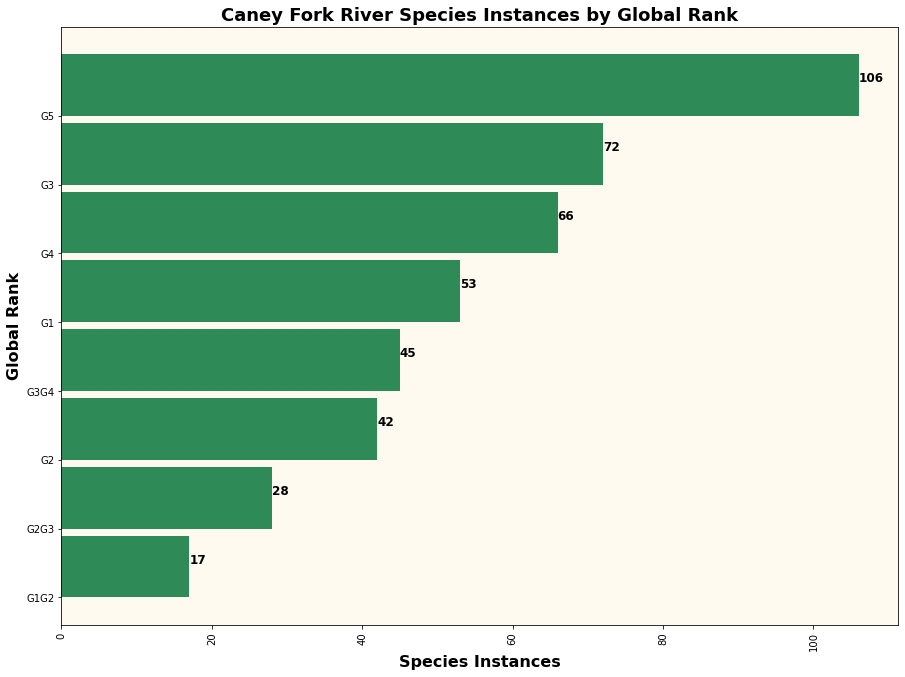

In [25]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = gtype_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Global Rank', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Caney Fork River Species Instances by Global Rank', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = gtype_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

State Rank:

In [26]:
stype_list = caney.State_Rank.tolist()

In [27]:
stype_dict = collections.Counter(stype_list)

In [28]:
stype_df = pd.DataFrame.from_dict(stype_dict, orient = 'index', columns = ['count'])

In [29]:
stype_df = stype_df.sort_values(['count'], ascending = False).reset_index(inplace = False)

In [30]:
stype_df = stype_df.head(6)

In [31]:
stype_df = stype_df.sort_values(['count'])

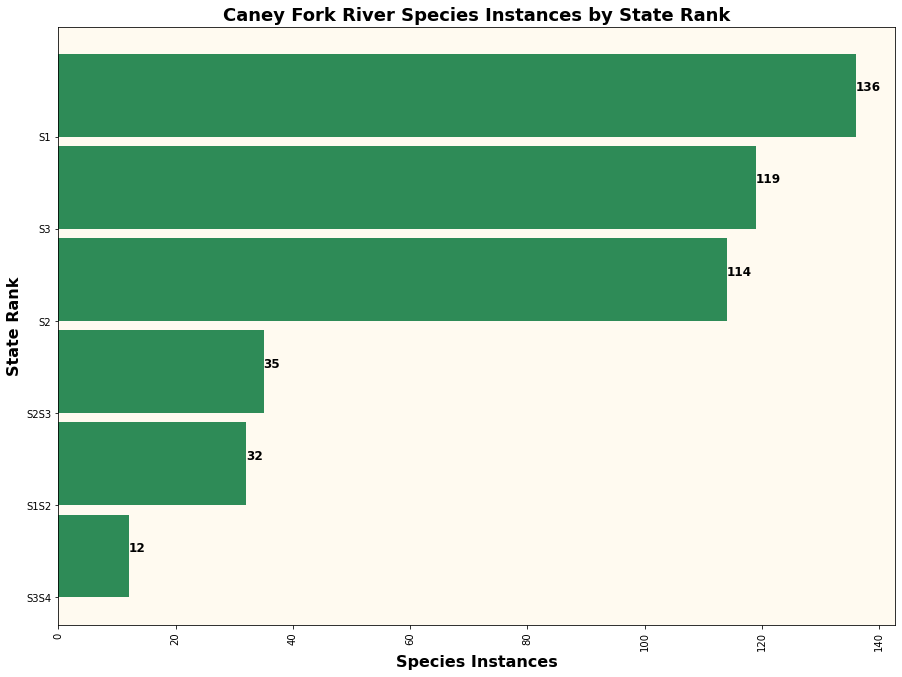

In [32]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = stype_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('State Rank', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Caney Fork River Species Instances by State Rank', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = stype_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

Federal Status:

In [33]:
fstat_list = caney.Fed_Status.tolist()

In [34]:
fstat_dict = collections.Counter(fstat_list)

In [35]:
fstat_df = pd.DataFrame.from_dict(fstat_dict, orient = 'index', columns = ['count'])

In [36]:
fstat_df = fstat_df.sort_values(['count']).reset_index(inplace = False)

In [37]:
fstat_df = fstat_df.sort_values(['count']).reset_index(inplace = False)

In [38]:
fstat_df

,level_0,index,count
0,0,DM,1
1,1,No Status,3
2,2,"LE, XN",5
3,3,LT,17
4,4,LE,44
5,5,--,396


In [39]:
fstat_df = fstat_df[(fstat_df['level_0'].isin([3, 4]))]

In [40]:
fstat_df

,level_0,index,count
3,3,LT,17
4,4,LE,44


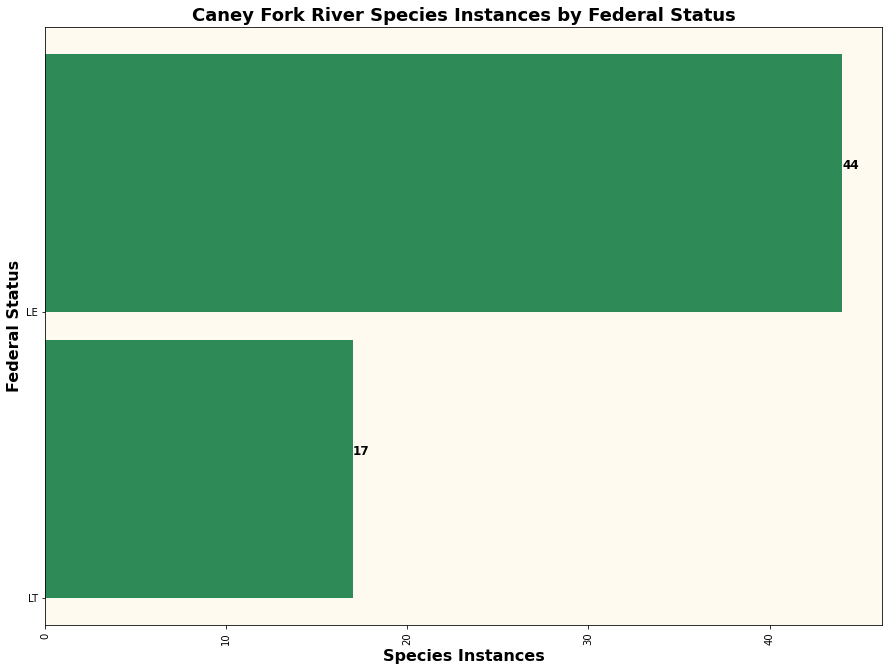

In [41]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = fstat_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Federal Status', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Caney Fork River Species Instances by Federal Status', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = fstat_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

Type:

In [42]:
type_list = caney.Type.tolist()

In [43]:
type_dict = collections.Counter(type_list)

In [44]:
type_df = pd.DataFrame.from_dict(type_dict, orient = 'index', columns = ['count'])

In [45]:
type_df = type_df.sort_values(['count']).reset_index(inplace = False)

In [46]:
type_df = type_df.tail(4)

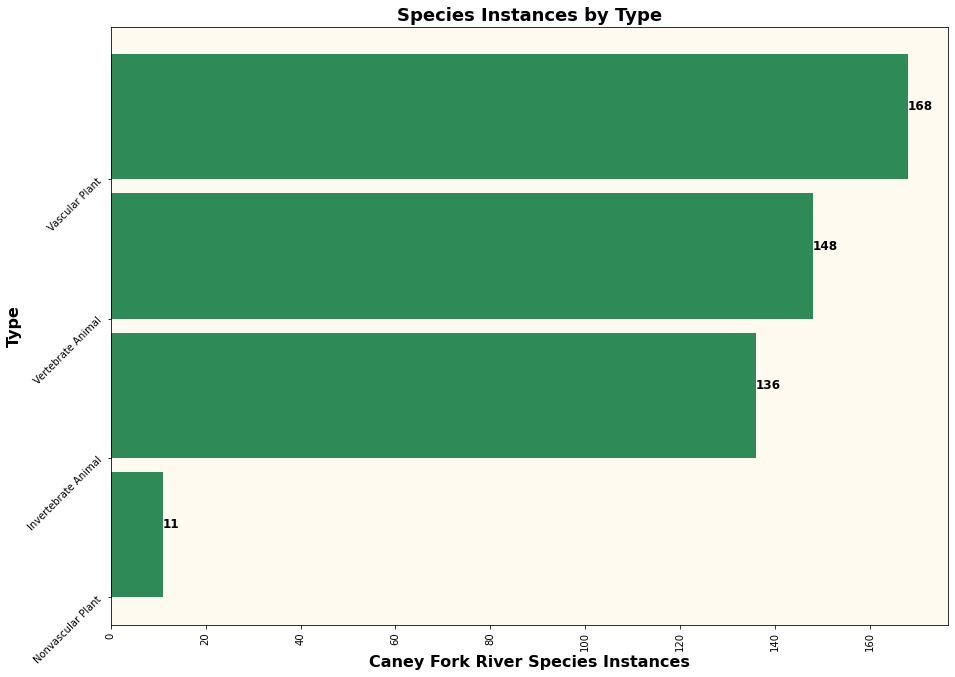

In [47]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = type_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Caney Fork River Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Type', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Species Instances by Type', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(rotation = 45, color = 'black')

for i in plt.barh('index', 'count', data = type_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

Category:

In [48]:
cat_list = caney.Category.tolist()

In [49]:
cat_dict = collections.Counter(cat_list)

In [50]:
cat_df = pd.DataFrame.from_dict(cat_dict, orient = 'index', columns = ['count'])

In [51]:
cat_df = cat_df.sort_values(['count']).reset_index(inplace = False)

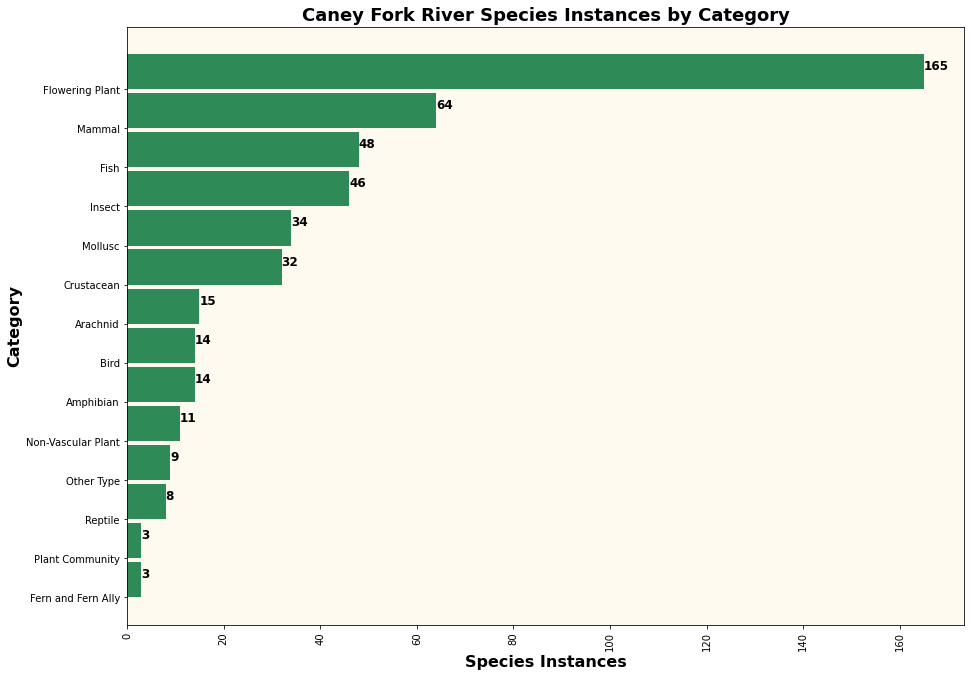

In [52]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = cat_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Category', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Caney Fork River Species Instances by Category', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = cat_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');